## 激活函数总结
### 激活函数是神经网络中的非线性函数，为了增强网络的表示能力和学习能力，激活函数有以下几点性质 
<p>
1. 连续且可导（允许少数点上不可导）的非线性函数。可导的激活函数可以直接利用数值优化的方法来学习网络参数。<br>
2.激活函数及其导函数要尽可能的简单，有利于提高网络计算效率。<br>
3.激活函数的导函数的值域要在一个合适的区间内（不能太大也不能太小），否则会影响训练的效率和稳定性。<br>

### $sigmoid$
$sigmoid$函数（也被称为Logistic函数）函数函数表达式如下:<p>
$σ(x)=\frac{exp(x)}{exp(x)+exp(0)}=\frac{1}{1+exp(-x)}$<p>
导数为:<p>$\frac{d}{dx}σ(x)=σ(x)(1-σ(x))$
<p>
其图像如下图，是一个S型曲线，所以Sigmoid函数可以看做一个“挤压”函数，把一个实数域的输入“挤压”到(0,1)。当输入值在0附近时，Sigmoid函数近似为线性函数；当输入值靠近两端时，对输入进行抑制；输入越小，越接近于0；输入越大，越接近于1。

$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$


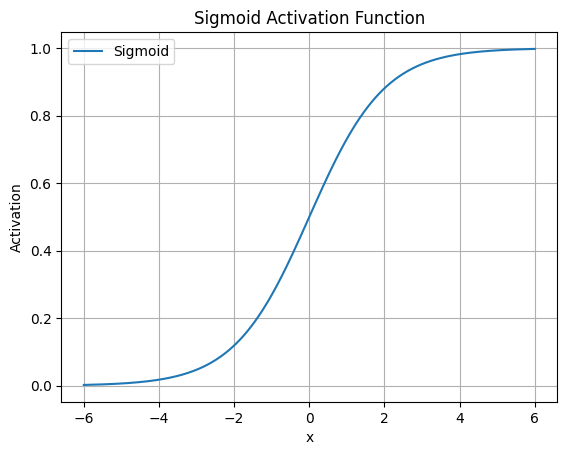

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn

x = np.linspace(-6, 6, 600)
m0 = nn.Sigmoid()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid()
plt.legend()
plt.show()


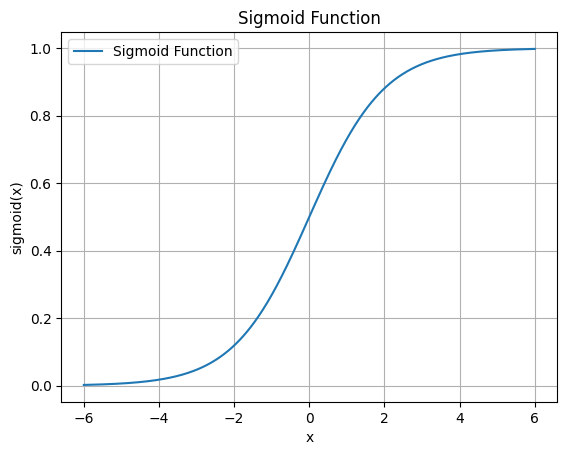

In [2]:
# 自定义激活函数
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
# 创建x区间从-6到6，切600份
x = np.linspace(-6, 6, 600)
y = sigmoid(x)

# 绘制sigmoid函数图像
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

Sigmoid激活函数的缺点：

倾向于梯度消失
函数输出不是以0为中心，会使其后一层的神经元的输入发生偏置偏移(Bias Shift)，进而使得梯度下降的收敛速度变慢，也就是会降低权重更新的效率
公式中包括指数运算，计算机运行较慢

### $tanh$ 
$Tanh$ 函数也是一种S型函数，其定义为:<p>
$\text{Tanh}(x) = \tanh(x) = \frac{\exp(x) - \exp(-x)} {\exp(x) + \exp(-x)}$<p>
Tanh函数可以看做放大并平移的Sigmoid函数，其值域为(-1,1)，并且Tanh与Sigmoid函数关系如下式：<p>
$tanh(x)=2\sigma(2x)-1$




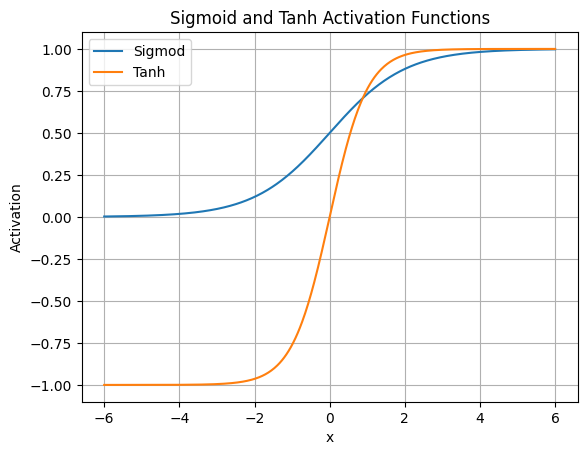

In [3]:
x = np.linspace(-6, 6, 600)
m0 = nn.Sigmoid()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='Sigmod')
m0_1 = nn.Tanh()
output0_1 = m0_1(torch.Tensor(x))
plt.plot(x, output0_1, label='Tanh')

plt.title("Sigmoid and Tanh Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


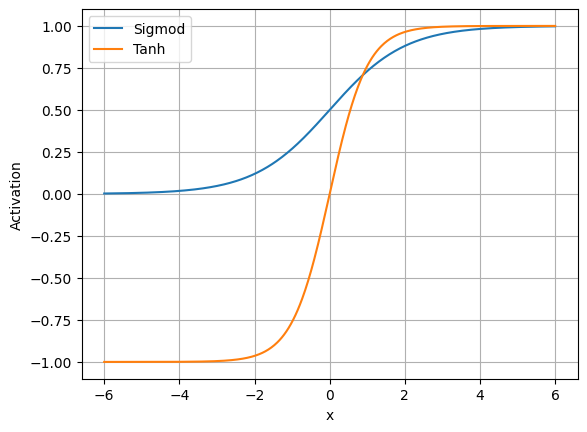

In [4]:
# 自定义激活函数
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return 2*sigmoid(2*x)-1

# 创建x区间从-6到6，切600份
x = np.linspace(-6, 6, 600)
output0 = sigmoid(x)
plt.plot(x, output0, label='Sigmod')

output0_1 = tanh(x)
plt.plot(x, output0_1, label='Tanh')

# 绘制sigmoid函数图像
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid(True)
plt.legend()
plt.show()

$ReLU$<p>
ReLU（Rectified Linear unit）是最常见的激活函数，其公式为：<p>
$\text{ReLU}(x) = (x)^+ = \max(0, x)$<p>
$
f(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\ 
0, & \text{if } x < 0 
\end{cases}
$

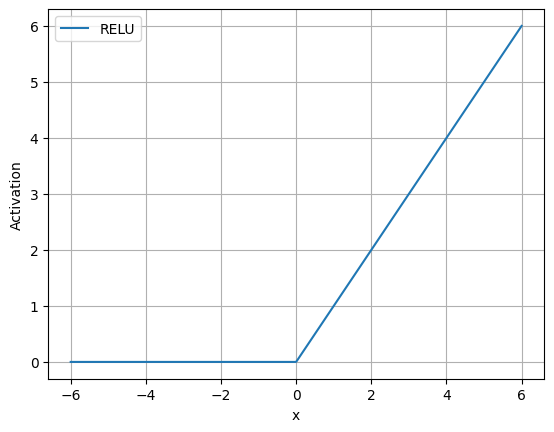

In [5]:
x = np.linspace(-6, 6, 600)
m0 = nn.ReLU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='RELU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


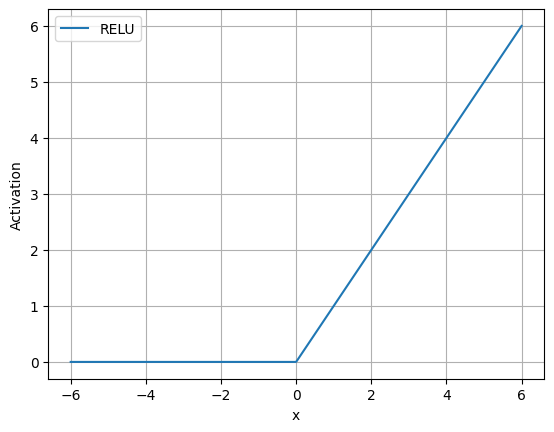

In [6]:
### 手搓 relu
# def relu(x):
#     return max(0, x) if isinstance(x, (int, float)) else np.maximum(0, x)
def relu(x):
    return np.where(x>0,x,0)

x = np.linspace(-6, 6, 600)
m0 = relu(x)
plt.plot(x, m0, label='RELU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

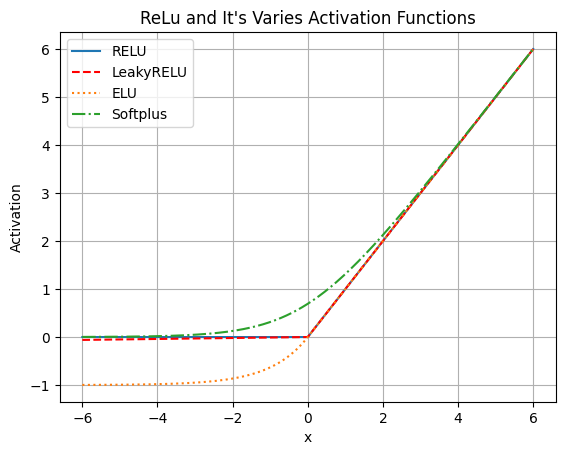

In [7]:
x = np.linspace(-6, 6, 600)
m0 = nn.ReLU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='RELU')
m1 = nn.LeakyReLU()
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label='LeakyRELU', color='red', linestyle='--')
m2 = nn.ELU()
output2 = m2(torch.Tensor(x))
plt.plot(x, output2, label='ELU', linestyle='dotted')
m3 = nn.Softplus()
output3 = m3(torch.Tensor(x))
plt.plot(x, output3, label='Softplus', linestyle='-.')

plt.title("ReLu and It's Varies Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


ReLU函数的优点是：1. 采用ReLU的神经元只需要进行加、乘和比较的操作，计算上更加高效。2. ReLU函数被认为具有生物学合理性，比如单侧抑制、宽兴奋边界。在生物神经网络中，同时处于兴奋状态的神经元非常稀疏，比如人脑中在同一时刻大概只有 1% ∼ 4% 的神经元处于活跃状态。Sigmoid 型激活函数会导致一个非稀疏的神经网络，而 ReLU 却具有很好的稀疏性，大约 50% 的神经元会处于激活状态．3. 相对于sigmoid函数的两端饱和，ReLU函数为左饱和函数，且在x>0时的导数为1，所以相比之下一定程度上缓解了梯度消失问题，加速梯度下降的收敛速度。

ReLU函数的缺点是：1. 函数输出是非零中心化的，会使其后一层的神经元的输入发生偏置偏移(Bias Shift)，进而使得梯度下降的收敛速度变慢。2. ReLU神经元在训练时比较容易”dead"，如果参数在一次不恰当的更新后，第一个隐藏层中的某个ReLU神经元在所有的训练数据上都不能被激活，那么这个神经元自身参数的梯度永远都会是0，在以后的训练过程中永远不能被激活，这种现象被称为死亡ReLU问题(Dying ReLU Problem)。(其他隐藏层也是有可能发生的)

为了避免ReLU的缺点，有以下几种广泛使用的ReLU变种


$Leaky ReLU$<p>的公式如下，也就是使输入x<0时，保持一个很小的梯度γ，使得神经元非激活时也有一个非零的梯度可以更新参数，避免永远不能被激活：

$\text{LeakyReLU}(x) = \max(0, x) + γ * \min(0, x)$<p>
$
LeakyReLU = 
\begin{cases} 
x, & \text{if } x \geq 0 \\ 
γ x, & \text{if } x < 0 
\end{cases}
$
<p>

γ是一个很小的常数，如0.01。 当γ<1时，Leaky ReLU 也可以写为<p>
$LeakyReLU(x)=max(x,γx)$

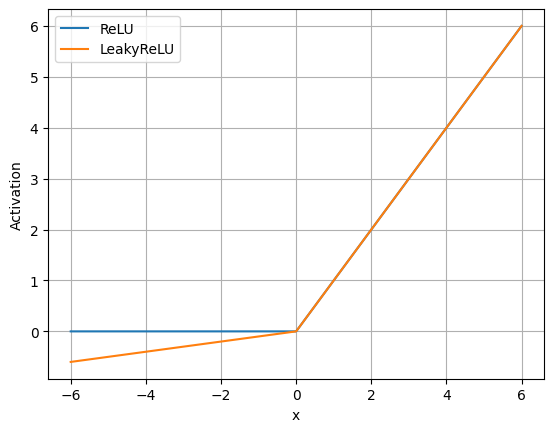

In [8]:
x = np.linspace(-6, 6, 600)
m0 = nn.ReLU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='ReLU')

m1 = nn.LeakyReLU(negative_slope=0.1)
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label='LeakyReLU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

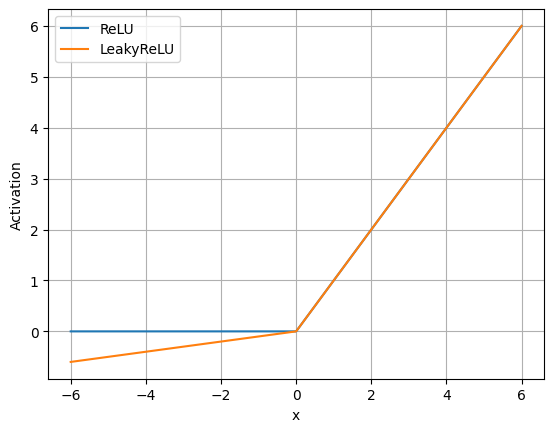

In [9]:
def leaky_relu_batch(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

x = np.linspace(-6, 6, 600)

output0 = relu(x)
plt.plot(x, output0, label='ReLU')

output1 = leaky_relu_batch(x,alpha=0.1)
plt.plot(x, output1, label='LeakyReLU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

$PReLU$<p>
PReLU（Parametric ReLU）引入了一个可学习的参数，不同神经元可以有不同的参数。对第i个神经元的PReLU定义为：<P>
\begin{align*}
PReLU_i(x) &= 
\begin{cases} 
x, & x \geq 0, \\
\gamma_i x, & x < 0.
\end{cases} \\
&= \max(0, x) + \gamma_i \cdot \min(0, x).
\end{align*}



其中$γ_i$为x ≤ 0 时函数的斜率，所以PReLU也是非饱和函数。<p>
如果$γ_i$=0,PReLU就退化为ReLU。<p>
如果$γ_i$是一个很小的常数，则PReLU就可以看作LeakyReLU。<p>
PReLU可以允许不同神经元具有不同的参数，也可以一组神经元共享一个参数。<p>




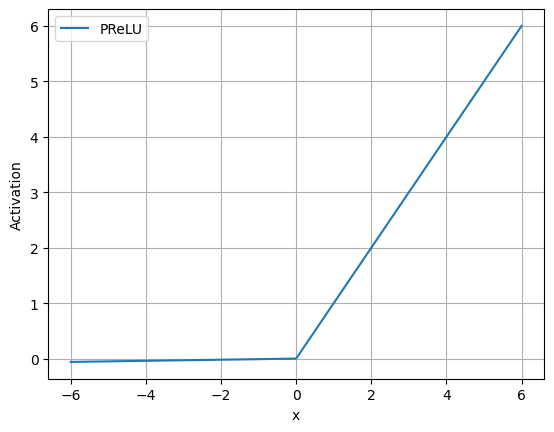

In [10]:
x = np.linspace(-6, 6, 600)
m0 = nn.PReLU(init=0.01)
output0 = m0(torch.Tensor(x))

plt.plot(x, output0.detach().numpy(), label='PReLU') # 数据类型需要转化
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


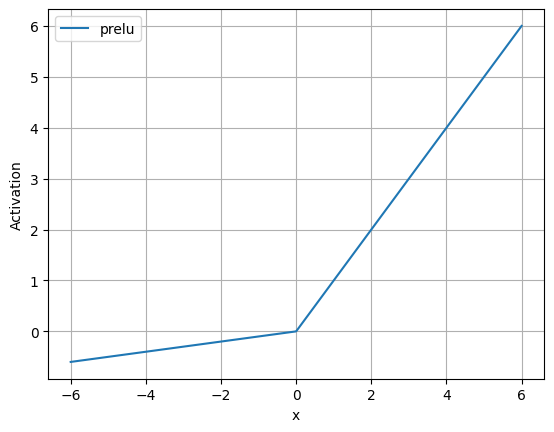

In [11]:
class CustomPReLU(nn.Module):
    def __init__(self, init=0.25):
        super(CustomPReLU, self).__init__()
        self.gamma = nn.Parameter(torch.tensor(init, requires_grad=True)) # 可学习参数
    def forward(self, x):
        return torch.maximum(torch.zeros_like(x), x) + self.gamma * torch.minimum(torch.zeros_like(x), x)
    
prelu = CustomPReLU(init=0.01)
x = np.linspace(-6, 6, 600)

output0 = prelu(torch.Tensor(x))
plt.plot(x, output1, label='prelu')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

$ELU$<p>
$ELU$（Exponential Linear Unit）的定义如下：<p>
\begin{align*}
EReLU(x) &= 
\begin{cases} 
x, & x > 0, \\
\gamma (\exp(x) - 1), & x \leq 0.
\end{cases} \\
&= \max(0, x) + \min(0, \gamma (\exp(x) - 1)).
\end{align*}
<p>

$\text{ELU}(x) = \begin{cases}
        x, & \text{ if } x > 0\\
        \alpha * (\exp(x) - 1), & \text{ if } x \leq 0
        \end{cases}$

定义中的γ ≥ 0是一个超参数，决定x ≤ 0时的饱和曲线，并调整输出均值在0附近，所以ELU是一个近似的零中心化的非线性函数。




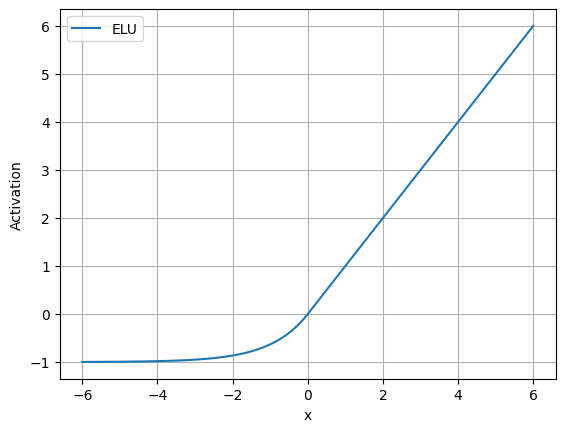

In [12]:
x = np.linspace(-6, 6, 600)
m0 = nn.ELU()
output0 = m0(torch.Tensor(x))
plt.plot(x, output0, label='ELU')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

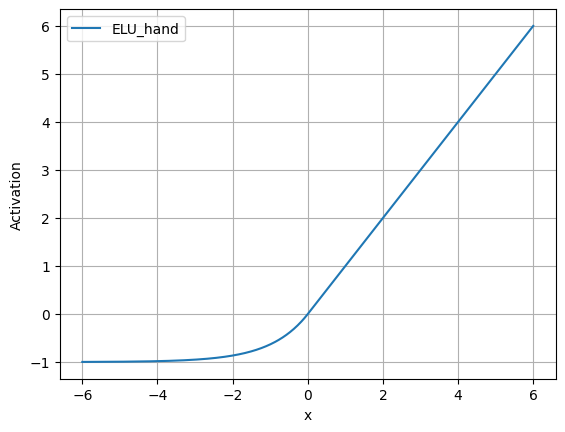

In [13]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-6, 6, 600)
output0 = elu(x)
plt.plot(x, output0, label='ELU_hand')
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

$SoftPlus$<p>
$SoftPlus$可以看作ReLU函数的平滑版本，其定义为：<p>
$
Softplus(x) = \log(1 + \exp(x))
$
<p>
SoftPlus的导数是Sigmoid函数
SoftPlus函数也有与ReLU函数一样的单侧抑制、宽兴奋边界的特性，但没有稀疏激活性。

代码注释公式<p>
$\text{Softplus}(x) = \frac{1}{\beta} *
    \log(1 + \exp(\beta * x))$



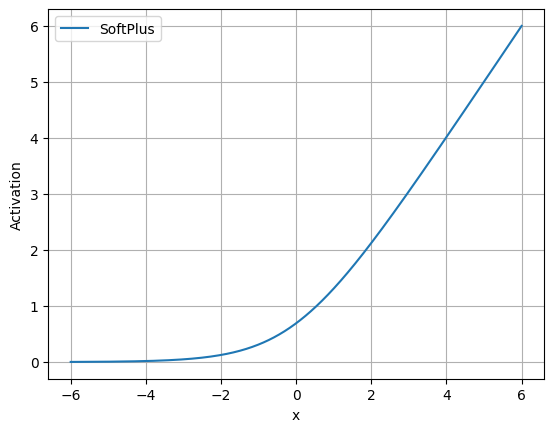

In [14]:
x = np.linspace(-6, 6, 600)
m0 = nn.Softplus()
output0 = m0(torch.tensor(x))
plt.plot(x, output0, label='SoftPlus')

# m1 = nn.ELU()
# output1 = m1(torch.tensor(x))
# plt.plot(x, output1, label="ELU")

plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

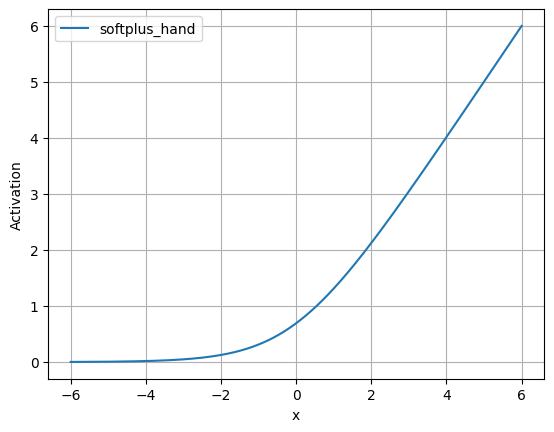

In [15]:
def softplus(x, beta=1.0):
    return (1 / beta) * np.log1p(np.exp(beta * x))  # log1p 提高数值稳定性

output0 = softplus(x)
plt.plot(x,output0, label="softplus_hand")
plt.xlabel("x")
plt.ylabel('Activation')
plt.grid()
plt.legend()
plt.show()


$Maxout$<p>
$Maxout$的输入是上一层神经元的全部原始输出，是一个向量$x=[x_1;x_2;...,;x_d]$<p>
每个Maxout单元有K个权重向量$w_K∈R^D(w_k=[w_{k,1,}...w_{k,D}]^T为第k个权重向量)$和偏执$b_k(1<=k<=K)$,对于输入$x$,可以得到K个净输入$z_k,1<=k<=K$:<p>
$$
z_k = \mathbf{w}_k^T \mathbf{x} + b_k
$$
Maxout单元的非线形函数定义为:
$$
\text{maxout}(x) = \max_{k \in [1, K]} (z_k)
$$
Maxout激活函数可以看做任意凸函数的分段线性近似，并且在有限的点上是不可微的。



$Mish$ <p>
Mish的函数表达式<p>
$$
\text{Mish}(x) = x \cdot \tanh(\text{Softplus}(x)) \\
= x \cdot \tanh(\ln(1 + e^x))
$$
<p>

$$\text{Mish}(x) = x \cdot \tanh(\text{Softplus}(x))$$


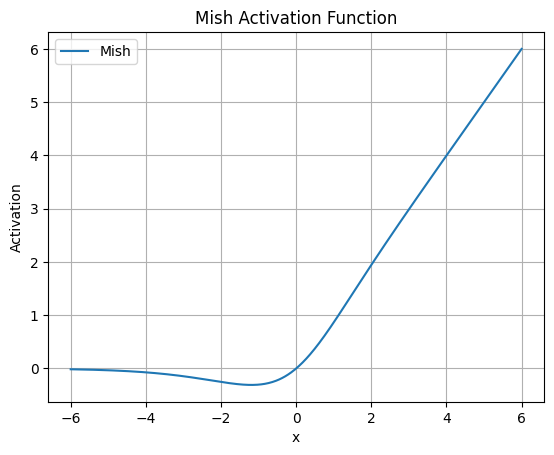

In [19]:
m1 = nn.Mish()
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label='Mish')
plt.title("Mish Activation Function")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


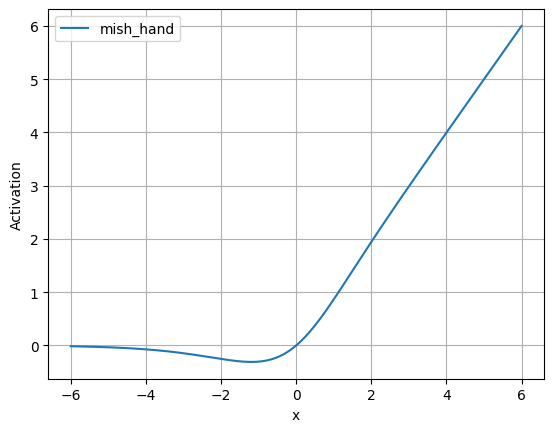

In [20]:
def mish_hand(x):
    return x * np.tanh(np.log1p(np.exp(x)))

output0 = mish_hand(x)
plt.plot(x,output0, label="mish_hand")
plt.xlabel("x")
plt.ylabel('Activation')
plt.grid()
plt.legend()
plt.show()

$Swish$ <p>
$Swish$的定义如下:<p>
$$
\text{swish}(x) = x \sigma(\beta x) \\
= x \frac{1}{1 + \exp(-\beta x)}
$$
σ是sigmoid函数<p>
β是可学习的参数或者一个固定超参数。<p>σ(.)∈(0,1)可以看作一种软性的门控机制，当σ(βx)接近于1时，门的状态为“开”状态，激活函数的输出近似于x本身；<p>当σ(βx)接近于0时，门的状态为“关”，激活函数的输出近似于0.



$ \text{silu}(x) = x * \sigma(x), \text{where } \sigma(x) \text{ is the logistic sigmoid.}$

当β = 0,β = 0时， Swish函数变成线性函数x/2
当β = 1,β = 1时， Swish函数在x>0时近似线性，在x<0时近似饱和，同时有一定的单调性
当β → + ∞ 时， Swish函数近似为ReLU函数
所以Swish函数可以看做线性函数和ReLU函数之间的非线性插值函数，其程度由β控制

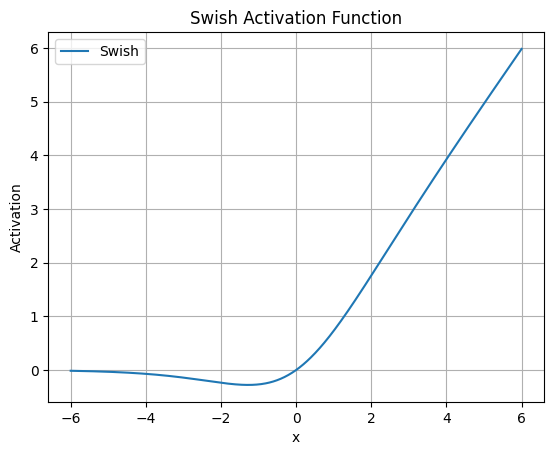

In [ ]:
x = np.linspace(-6, 6, 600)
m1 = nn.SiLU()
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label="Swish")
plt.title("Swish Activation Function")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

$GELU$<p>
GELU (Gaussian Error Linear Unit) 也是通过门控机制来调整其输出值的激活函数，其表达式为：
$$
\text{GELU}(x) = x P(X \leq x)
$$
<p>

其中的$P(X≤x)$是高斯分布$N(μ,σ^2)$的累积分布函数，μ和σ也是超参数，一般取标准分布，即μ=0,σ=1。<p>
由于高斯分布的累积分布函数为S型函数，所以它可以用Tanh和Sigmoid函数来近似：<p>
$$
\text{GELU}(x) \approx 0.5x \left( 1 + \tanh\left( \sqrt{\frac{2}{\pi}} \left( x + 0.044715x^3 \right) \right) \right)
$$

$$
\text{GELU}(x) \approx x \sigma(1.702x)
$$
<p>
大模型gpt3使用GELU激活函数




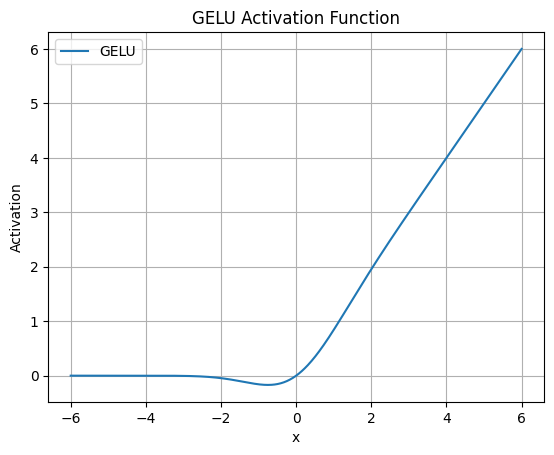

In [22]:
x = np.linspace(-6, 6, 600)
m1 = nn.GELU()
output1 = m1(torch.Tensor(x))
plt.plot(x, output1, label='GELU')
plt.title("GELU Activation Function")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()


$GLU$<p>
Gated Linear Units (GLU) 是在论文《Language Modeling with Gated Convolutional Networks》 中被提出来的，计算表达式为：<p>
$$
\text{GLU}(a, b) = a \otimes \sigma(b)
$$
上式中的σ是sigmoid函数，$\otimes$是矩阵间的按元素乘。

从直觉上来说，对于语言模型门控(gate)机制允许选择对于预测下一个单词更重要的单词或特征。

在论文《GLU Variants Improve Transformer》 中下面几种GLU变种被提出。



$ReGLU$<p>
ReGLU是采用ReLU函数作为激活函数的GLU变体<p>
$$
\text{ReGLU}(x, W, V, b, c) = \max(0, xW + b) \otimes (xV + c)
$$
JINA EMBEDDINGS 2 对于large版本使用的是ReGLU，其作者说对于大模型使用GEGLU相对没有那么稳定。



$SwiGLU$<p>
$SwiGLU$可以看做采用Swish作为激活函数的GLU变体<p>
$$
\text{SwiGLU}(x, W, V, b, c) = Swish_1(xW + b) \otimes (xV + c)
$$
Meta开源的LLaMA 和 LLaMA2 以及 Baichuan大模型使用的激活函数是SwiGLU。



$GEGLU$<p>
GEGLU则可以看做采用GELU作为激活函数的GLU变体<p>
$$
\text{GEGLU}(x, W, V, b, c) = GEGLU(xW + b) \otimes (xV + c)
$$
<p>GLM-130B 大模型使用的是GEGLU。

